In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='035e9bae-1e7d-42d9-a89c-9882bd8ec621', project_access_token='p-70c188e697e69fc3d6c5c9291ae9d7bcb1232bc7')
pc = project.project_context


# MARATONA BEHIND THE CODE 2020

## DESAFIO 7 - TNT

<hr>

## Installing Libs

In [2]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.23.2)


In [3]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in /opt/conda/envs/Python36/lib/python3.6/site-packages (1.2.0)


In [4]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.0)


<hr>

## Download dos conjuntos de dados em formato .csv

In [5]:
import pandas as pd

In [6]:
# instalação das libs
!pip install cloudant

In [7]:
#importar o cloudant e o pandas
from cloudant import Cloudant #para leitura do DB criado na IBM
import pandas as pd #para manipulação de dados

In [8]:
#username, password e account do CLOUDANT
u, p, a = "f8feb180-af11-4409-a963-9079bd02e37f-bluemix", "3963d41189c61c36f3c90159ae2f25f7d3cbcebb890fd0108c447d234f360450", "f8feb180-af11-4409-a963-9079bd02e37f-bluemix"
#cria o cliente com um objeto Cloudant
client = Cloudant(cloudant_user=u,auth_token=p, account=a, connect=True, auto_renew=True)

In [9]:
#conexão com o banco de dados
db = client['simone-iot']
response = db.all_docs(limit=20000, include_docs=True)
docs = [] 
for r in response['rows']: 
  docs.append(r['doc']) 
  type(docs)

In [10]:
#criando o Dataframe
df_training_dataset = pd.DataFrame(data=docs) 
#alterando as colunas latitude e longitude para float
df_training_dataset['LAT'] = df_training_dataset['LAT'].astype(float) 
df_training_dataset['LONG']= df_training_dataset['LONG'].astype(float) 

In [11]:
#criando uma lista com as features que eu quero transformar para int64
colunas_int = ['Movimentação','Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina','Citrus', 'Açaí-Guaraná', 'Pêssego', 'row']

In [12]:
#convertendo as colunas para int
df_training_dataset[colunas_int] = df_training_dataset[colunas_int].astype(int)

In [13]:
#capturando informações do DB
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18904 entries, 0 to 18903
Data columns (total 17 columns):
Açaí-Guaraná    18904 non-null int64
Citrus          18904 non-null int64
Estação         18904 non-null object
LAT             18904 non-null float64
LONG            18904 non-null float64
Maçã-Verde      18904 non-null int64
Movimentação    18904 non-null int64
Original_269    18904 non-null int64
Original_473    18904 non-null int64
Pêssego         18904 non-null int64
TARGET          18904 non-null object
Tangerina       18904 non-null int64
Tempo           18904 non-null object
Zero            18904 non-null int64
_id             18904 non-null object
_rev            18904 non-null object
row             18904 non-null int64
dtypes: float64(2), int64(10), object(5)
memory usage: 2.5+ MB


In [14]:
#visualizando as primeiras cinco observações do dataset
df_training_dataset.head()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,_id,_rev,row
0,37,16,Campo Belo,-23.6188,-46.6823,12,24877,49,10,11,REABASTECER,7,2018-7-5,38,0ea134b1f163fdbef419fa243c003e07,1-de6b0717759c54b156edb3d57ffcb157,15305
1,21,39,República,-23.5436,-46.6434,23,110704,33,54,6,REABASTECER,43,2018-5-9,49,0ea134b1f163fdbef419fa243c006b43,1-7483d4e06fedb9f75c2dbc78865708aa,6609
2,37,40,Tatuapé,-23.5402,-46.5765,36,67821,56,6,29,REABASTECER,40,2018-12-7,45,0ea134b1f163fdbef419fa243c0077a4,1-9c59ef71420376a790fec8ad3880ee45,6097
3,43,33,Campo Belo,-23.6188,-46.6823,43,25667,33,50,36,NORMAL,37,2018-8-22,36,0ea134b1f163fdbef419fa243c008dca,1-4158d9e22fbc7b4d03e5f454160f1698,15352
4,13,43,Campo Belo,-23.6188,-46.6823,16,26728,58,62,4,NORMAL,7,2018-8-30,42,0ea134b1f163fdbef419fa243c008e48,1-74445e4a69e69fc32283064e8fa3a27a,15360


In [15]:
df_training_dataset.describe()

,Açaí-Guaraná,Citrus,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,Tangerina,Zero,row
count,18904.000000,18904.000000,18904.000000,18904.000000,18904.000000,18904.000000,18904.000000,18904.000000,18904.000000,18904.000000,18904.000000,18904.000000
mean,23.875370,24.512643,-23.572536,-46.652887,24.415521,67678.260527,36.236775,46.842573,23.927529,24.030628,35.736511,8522.605480
std,12.348937,12.021219,0.026300,0.033172,12.113155,44119.562872,18.643406,25.598964,12.296120,12.303871,19.001007,4926.714153
min,1.000000,1.000000,-23.626300,-46.725200,1.000000,13593.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,13.000000,14.000000,-23.589500,-46.682300,14.000000,33224.750000,20.000000,25.000000,13.000000,13.000000,19.000000,4279.750000
50%,24.000000,25.000000,-23.566400,-46.648200,24.000000,64139.000000,36.000000,47.000000,24.000000,24.000000,36.000000,8489.500000
75%,34.000000,35.000000,-23.550000,-46.634600,35.000000,89823.000000,53.000000,69.000000,35.000000,35.000000,52.000000,12806.500000
max,43.000000,43.000000,-23.536500,-46.576500,43.000000,195289.000000,65.000000,86.000000,43.000000,43.000000,65.000000,17016.000000


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os pontos de vendas da TNT:

**Tempo**

**Estação**

**LAT**

**LONG**

**Movimentação**

**Original_473**

**Original_269**

**Zero**

**Maçã-Verde**

**Tangerina**

**Citrus**

**Açaí-Guaraná**

**Pêssego**

**TARGET**

In [16]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18904 entries, 0 to 18903
Data columns (total 17 columns):
Açaí-Guaraná    18904 non-null int64
Citrus          18904 non-null int64
Estação         18904 non-null object
LAT             18904 non-null float64
LONG            18904 non-null float64
Maçã-Verde      18904 non-null int64
Movimentação    18904 non-null int64
Original_269    18904 non-null int64
Original_473    18904 non-null int64
Pêssego         18904 non-null int64
TARGET          18904 non-null object
Tangerina       18904 non-null int64
Tempo           18904 non-null object
Zero            18904 non-null int64
_id             18904 non-null object
_rev            18904 non-null object
row             18904 non-null int64
dtypes: float64(2), int64(10), object(5)
memory usage: 2.5+ MB


In [17]:
df_training_dataset.nunique()

Açaí-Guaraná       42
Citrus             43
Estação            25
LAT                25
LONG               25
Maçã-Verde         43
Movimentação    10573
Original_269       65
Original_473       81
Pêssego            42
TARGET              2
Tangerina          42
Tempo             720
Zero               63
_id             18904
_rev            11605
row             11605
dtype: int64

<hr>

## Detalhamento do desafio: classificação binária

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de aplicativo de um banco. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``TARGET``

<hr>

In [18]:
#aqui vejo a quantidade de linhas e colunas do dataset
df_training_dataset.shape

(18904, 17)

In [19]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18904 entries, 0 to 18903
Data columns (total 17 columns):
Açaí-Guaraná    18904 non-null int64
Citrus          18904 non-null int64
Estação         18904 non-null object
LAT             18904 non-null float64
LONG            18904 non-null float64
Maçã-Verde      18904 non-null int64
Movimentação    18904 non-null int64
Original_269    18904 non-null int64
Original_473    18904 non-null int64
Pêssego         18904 non-null int64
TARGET          18904 non-null object
Tangerina       18904 non-null int64
Tempo           18904 non-null object
Zero            18904 non-null int64
_id             18904 non-null object
_rev            18904 non-null object
row             18904 non-null int64
dtypes: float64(2), int64(10), object(5)
memory usage: 2.5+ MB


In [20]:
#retirando linha repetida
df_training_dataset = df_training_dataset.drop_duplicates(subset=['row']).copy()

In [21]:
df_training_dataset.shape

(11605, 17)

In [22]:
df_training_dataset.head()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,_id,_rev,row
0,37,16,Campo Belo,-23.6188,-46.6823,12,24877,49,10,11,REABASTECER,7,2018-7-5,38,0ea134b1f163fdbef419fa243c003e07,1-de6b0717759c54b156edb3d57ffcb157,15305
1,21,39,República,-23.5436,-46.6434,23,110704,33,54,6,REABASTECER,43,2018-5-9,49,0ea134b1f163fdbef419fa243c006b43,1-7483d4e06fedb9f75c2dbc78865708aa,6609
2,37,40,Tatuapé,-23.5402,-46.5765,36,67821,56,6,29,REABASTECER,40,2018-12-7,45,0ea134b1f163fdbef419fa243c0077a4,1-9c59ef71420376a790fec8ad3880ee45,6097
3,43,33,Campo Belo,-23.6188,-46.6823,43,25667,33,50,36,NORMAL,37,2018-8-22,36,0ea134b1f163fdbef419fa243c008dca,1-4158d9e22fbc7b4d03e5f454160f1698,15352
4,13,43,Campo Belo,-23.6188,-46.6823,16,26728,58,62,4,NORMAL,7,2018-8-30,42,0ea134b1f163fdbef419fa243c008e48,1-74445e4a69e69fc32283064e8fa3a27a,15360


## Pre-processando o dataset antes do treinamento

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [23]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [24]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Açaí-Guaraná    0
Citrus          0
Estação         0
LAT             0
LONG            0
Maçã-Verde      0
Movimentação    0
Original_269    0
Original_473    0
Pêssego         0
TARGET          0
Tangerina       0
Tempo           0
Zero            0
_id             0
_rev            0
row             0
dtype: int64

Valores nulos no df_training_dataset após a transformação SimpleImputer: 

Açaí-Guaraná    0
Citrus          0
Estação         0
LAT             0
LONG            0
Maçã-Verde      0
Movimentação    0
Original_269    0
Original_473    0
Pêssego         0
TARGET          0
Tangerina       0
Tempo           0
Zero            0
_id             0
_rev            0
row             0
dtype: int64



### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [25]:
df_training_dataset_imputed.tail()

,Açaí-Guaraná,Citrus,Estação,LAT,LONG,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Tempo,Zero,_id,_rev,row
11600,24,37,Barra Funda,-23.5542,-46.6707,18,149457,65,78,7,NORMAL,13,2018-10-24,20,fb65e5a48b17064637c8f1ca5efe1e21,1-79ed908290ce124266f57958cfd21bdf,5334
11601,23,5,Barra Funda,-23.5542,-46.6707,33,148034,62,66,12,NORMAL,10,2018-11-5,19,fb65e5a48b17064637c8f1ca5efe2d36,1-fc0e2214c4e44bb168da25bb8567b522,5345
11602,5,35,Brooklin,-23.6263,-46.6878,43,26063,47,6,16,REABASTECER,28,2018-10-7,65,fb65e5a48b17064637c8f1ca5efeb179,1-dcb9fe9c40c985fc024c084541f56b0a,14677
11603,29,10,Campo Belo,-23.6188,-46.6823,43,25677,32,58,5,REABASTECER,8,2018-2-26,42,ffe0b31d20e51f75f7718d21acff75be,1-85fd6f9c45f80dd301b80f2167266982,15176
11604,7,6,Campo Belo,-23.6188,-46.6823,35,26565,45,54,34,REABASTECER,36,2018-4-2,38,ffe0b31d20e51f75f7718d21acffb1ac,1-acc86d55615021cfb08ecf63cfa7fe9f,15212


In [26]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Tempo', 'LAT', 'LONG','_rev','row','_id','Estação'], inplace=False)

In [27]:
df_training_dataset_rmcolumns.tail()

,Açaí-Guaraná,Citrus,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Zero
11600,24,37,18,149457,65,78,7,NORMAL,13,20
11601,23,5,33,148034,62,66,12,NORMAL,10,19
11602,5,35,43,26063,47,6,16,REABASTECER,28,65
11603,29,10,43,25677,32,58,5,REABASTECER,8,42
11604,7,6,35,26565,45,54,34,REABASTECER,36,38


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [28]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
#df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['Estação'])
df_training = df_training_dataset_rmcolumns
df_training.tail()

,Açaí-Guaraná,Citrus,Maçã-Verde,Movimentação,Original_269,Original_473,Pêssego,TARGET,Tangerina,Zero
11600,24,37,18,149457,65,78,7,NORMAL,13,20
11601,23,5,33,148034,62,66,12,NORMAL,10,19
11602,5,35,43,26063,47,6,16,REABASTECER,28,65
11603,29,10,43,25677,32,58,5,REABASTECER,8,42
11604,7,6,35,26565,45,54,34,REABASTECER,36,38


# Atenção!

A coluna **TARGET** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [29]:
df_training.columns

Index(['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Movimentação', 'Original_269',
       'Original_473', 'Pêssego', 'TARGET', 'Tangerina', 'Zero'],
      dtype='object')

In [30]:
features = df_training[
    ['Açaí-Guaraná', 'Citrus', 'Maçã-Verde', 'Movimentação',
       'Original_269', 'Original_473', 'Pêssego', 'Tangerina',
       'Zero'
    ]
]
target = df_training['TARGET']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=700)

### Treinando uma árvore de decisão

In [32]:
# Author: Raghav RV <rvraghav93@gmail.com>
# License: BSD

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

print(df_training)

       Açaí-Guaraná  Citrus  Maçã-Verde  Movimentação  Original_269  \
0                37      16          12         24877            49   
1                21      39          23        110704            33   
2                37      40          36         67821            56   
3                43      33          43         25667            33   
4                13      43          16         26728            58   
5                 9      26          21         70523             4   
6                 6      32           9         68903            23   
7                43      28           4         69443            38   
8                38      26          15        110639            43   
9                43      23          31         26599            51   
10               12      33          14         69068            29   
11               23      35           8         67452            55   
12               43      34          39         67249             8   
13    

In [37]:
# Método para criar um árvore de decisão
dtc = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid={'min_samples_split': range(2, 403, 10)},refit='AUC', return_train_score=True).fit(X_train, y_train)

In [38]:
y_pred = dtc.predict(X_test)
print(y_pred)

['NORMAL' 'NORMAL' 'REABASTECER' ... 'NORMAL' 'REABASTECER' 'NORMAL']


### Analisando a qualidade do modelo através da matriz de confusão

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

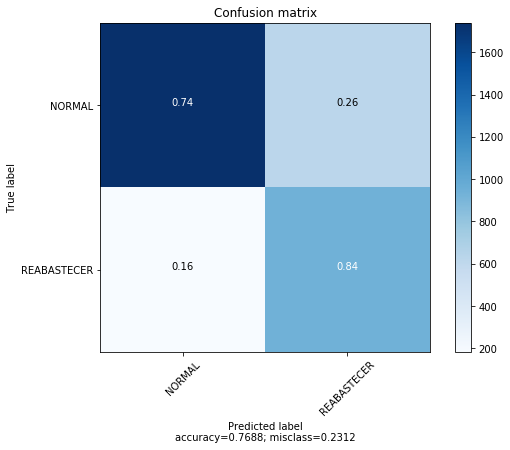

In [40]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['NORMAL', 'REABASTECER'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [ ]:
!wget --no-check-certificate --content-disposition https://gitlab.com/JoaoPedroPP/datasets/-/raw/master/ntn/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored.csv')
df_to_be_scored.tail()

In [ ]:
df_to_be_scored = pd.read_csv('to_be_scored.csv')
df_to_be_scored.tail()

# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "TARGET" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [ ]:
df_to_be_scored.info()

<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [ ]:
# 1 - Removendo linhas com valores NaN
df_to_be_scored_1 = df_to_be_scored.dropna(axis='index', how='any', subset=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação', 'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina', 'Citrus', 'Açaí-Guaraná', 'Pêssego'])

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Tempo', 'Estação', 'LAT', 'LONG', 'Movimentação'], inplace=False)

# 4 - Encoding com "dummy variables" (se necessário)
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['Váriavel com dummy'])
df_to_be_scored_4 = df_to_be_scored_3

df_to_be_scored_4.tail()

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [ ]:
df_training[
    [
        'Original_473', 'Original_269', 'Zero', 'Maçã-Verde', 'Tangerina',
       'Citrus', 'Açaí-Guaraná', 'Pêssego'
    ]
].columns

In [ ]:
df_to_be_scored_4.columns

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [ ]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['TARGET'] = y_pred
df_to_be_scored_4.tail()

### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [ ]:
project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://tnt.maratona.dev
